##Case Definition

Untuk memahami sebuah bahan bacaan diperlukan kemampuan untuk menemukan topik dari bahan bacaan tersebut, terlebih lagi bahan bacaan yang memiliki kuantitas dan kualitas konten yang cukup berat, sebagai contohnya adalah peraturan perundang-undangan,  diperlukan kemampuan yang sangat baik untuk memahami isi peraturan perundang-undangan tersebut. Oleh karena itu, perlu dilakukan upaya untuk mempermudah pembaca dalam memahami peraturan perundang-undangan

---

Topic modelling merupakan salah satu solusi yang dapat dilakukan untuk membedah topic dari ayat dalam undang-undang. Dalam kasus ini penulis mencoba untuk membedah topik yang terdapat pada setiap ayat yang terkandung dalam Peraturan Menteri Keungan No 5 Tahun 2021 menggunakan teknik LDA dan teknik LSA

##Dependencies

Tahap pertama yang dilakukan yaitu mengimport package-package yang diperlukan untuk analisis data dan prosessing data text

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import nltk
nltk.download('stopwords')
nltk.download('punkt')
sw_indo = stopwords.words('indonesian') + list(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##Processing teks

Tahap processing teks dilakukan dengan tahapan sebagai berikut:

1.   Remove punctuation and case folding : Melakukan penghapusan karakter yang tidak dibutuhkan serta melakukan normalisasi teks menjadi huruf kecil
2.   Stop words : Menghapus kata yang tidak memiliki makna
3.   Steamming : Mengubah setiap kata berimbuhan menjadi kata dasar






In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data44 (1).csv')

In [ ]:
df

Unnamed: 0                                               ayat  \
0               0  Pasal 5 ayat (2) Undang-Undang Dasar 1945;   2...   
1               1       Pasal 1     Negara Republik Indonesia mel...   
2               2       Pasal 2     Nilai penyertaan modal Negara...   
3               3       Pasal 3      Pelaksanaan penyertaan modal...   
4               4       Pasal 4     Peraturan Pemerintah ini mula...   
...           ...                                                ...   
21539         127      Pasal 56    Peraturan Pemerintah ini mulai...   
21540         128      Agar setiap orang mengetahuinya, memerinta...   
21541         129               Ditetapkan di Jakarta          pa...   
21542         130              SOEHARTO      Diundangkan di Jakar...   
21543         131                                  SUDHARMONO, S.H.    

                      bobot  
0      Peraturan_Pemerintah  
1      Peraturan_Pemerintah  
2      Peraturan_Pemerintah  
3      Peraturan_Pemerintah  
4      Peraturan_Pemerintah  
...                     ...  
21539                    PP  
21540                    PP  
21541                    PP  
21542                    PP  
21543                    PP  

[21544 rows x 3 columns]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
pd.set_option('display.max_rows', 100)
df

Unnamed: 0                                               ayat  \
0               0  Pasal 5 ayat (2) Undang-Undang Dasar 1945;   2...   
1               1       Pasal 1     Negara Republik Indonesia mel...   
2               2       Pasal 2     Nilai penyertaan modal Negara...   
3               3       Pasal 3      Pelaksanaan penyertaan modal...   
4               4       Pasal 4     Peraturan Pemerintah ini mula...   
...           ...                                                ...   
21539         127      Pasal 56    Peraturan Pemerintah ini mulai...   
21540         128      Agar setiap orang mengetahuinya, memerinta...   
21541         129               Ditetapkan di Jakarta          pa...   
21542         130              SOEHARTO      Diundangkan di Jakar...   
21543         131                                  SUDHARMONO, S.H.    

                      bobot  
0      Peraturan_Pemerintah  
1      Peraturan_Pemerintah  
2      Peraturan_Pemerintah  
3      Peraturan_Pemerintah  
4      Peraturan_Pemerintah  
...                     ...  
21539                    PP  
21540                    PP  
21541                    PP  
21542                    PP  
21543                    PP  

[21544 rows x 3 columns]

In [ ]:
df= df.drop(columns=['Unnamed: 0'])
df

ayat                 bobot
0      Pasal 5 ayat (2) Undang-Undang Dasar 1945;   2...  Peraturan_Pemerintah
1           Pasal 1     Negara Republik Indonesia mel...  Peraturan_Pemerintah
2           Pasal 2     Nilai penyertaan modal Negara...  Peraturan_Pemerintah
3           Pasal 3      Pelaksanaan penyertaan modal...  Peraturan_Pemerintah
4           Pasal 4     Peraturan Pemerintah ini mula...  Peraturan_Pemerintah
...                                                  ...                   ...
21539      Pasal 56    Peraturan Pemerintah ini mulai...                    PP
21540      Agar setiap orang mengetahuinya, memerinta...                    PP
21541               Ditetapkan di Jakarta          pa...                    PP
21542              SOEHARTO      Diundangkan di Jakar...                    PP
21543                                  SUDHARMONO, S.H.                     PP

[21544 rows x 2 columns]

In [ ]:
df['bobot'].value_counts()

perpu                               6984
Undang-Undang                       5182
Peraturan_Pemerintah                3498
UU                                  1756
PMK                                  600
Perpres                              522
Peraturan_Presiden                   495
PP                                   474
KEPMEN                               401
Keputusan_Presiden                   281
KEPMNG_LH_9_2001                     216
PERMEN_KOMARVES_6_2020               198
pmmarves                             196
Perpu                                180
PERATURAN_PEMERINTAH                 172
PERMEN_DAGRI_52_2012                  82
pp049                                 81
PERPRES                               73
Keppres                               67
kp1831998                             41
pp031                                 28
PERMEN_PERIN_64MINDPER72016_2016      16
Inpres                                 1
Name: bobot, dtype: int64

In [ ]:
df['Peraturan Perundang Undangan']= df['bobot']

In [ ]:
def Bobot(x):
  if x in ['Undang-Undang', 'UU','perpu', 'Perpu']:
    return 4
  elif x in ['Peraturan_Pemerintah','PP', 'PERATURAN_PEMERINTAH','pp049','pp031']:
    return 3
  elif x in ['Perpres', 'Peraturan_Presiden', 'Keputusan_Presiden', 'Keppres', 'PERPRES', 'kp1831998','Inpres']:
    return 2
  elif x in ['PMK', 'KEPMEN', 'KEPMNG_LH_9_2001', 'PERMEN_KOMARVES_6_2020','pmmarves', 'PERMEN_DAGRI_52_2012', 'PERMEN_PERIN_64MINDPER72016_2016']:
    return 1

In [ ]:
bobot = []
for i in df['bobot']:
  bobot.append(Bobot(i))

In [ ]:
df['bobot'] = df['bobot'].apply(lambda x: bobot.pop(0))

In [ ]:
df

ayat  bobot  \
0      Pasal 5 ayat (2) Undang-Undang Dasar 1945;   2...      3   
1           Pasal 1     Negara Republik Indonesia mel...      3   
2           Pasal 2     Nilai penyertaan modal Negara...      3   
3           Pasal 3      Pelaksanaan penyertaan modal...      3   
4           Pasal 4     Peraturan Pemerintah ini mula...      3   
...                                                  ...    ...   
21539      Pasal 56    Peraturan Pemerintah ini mulai...      3   
21540      Agar setiap orang mengetahuinya, memerinta...      3   
21541               Ditetapkan di Jakarta          pa...      3   
21542              SOEHARTO      Diundangkan di Jakar...      3   
21543                                  SUDHARMONO, S.H.       3   

      Peraturan Perundang Undangan  
0             Peraturan_Pemerintah  
1             Peraturan_Pemerintah  
2             Peraturan_Pemerintah  
3             Peraturan_Pemerintah  
4             Peraturan_Pemerintah  
...                            ...  
21539                           PP  
21540                           PP  
21541                           PP  
21542                           PP  
21543                           PP  

[21544 rows x 3 columns]

In [ ]:
df.shape[0]

21544

In [ ]:
from wordcloud import WordCloud

In [ ]:
long_teks = ' '.join(x for x in list(df['ayat'].values) if type(x) == str)
long_teks

'Pasal 5 ayat (2) Undang-Undang Dasar 1945;   2. Indische Comptabiliteitswet (Staatsblad Tahun 1925 Nomor 448) sebagaimana  telah beberapa kali diubah, terakhir dengan Undang-undang Nomor 9 Tahun 1968  (Lembaran Negara Tahun 1968 Nomor 53, Tambahan Lembaran Negara Nomor 2860);      MEMUTUSKAN:      Menetapkan:   PERATURAN PEMERINTAH REPUBLIK I NDONESIA TENTANG PENYERTAAN MODAL  NEGARA REPUBLIK INDONESIA DALA M PENDIRIAN PERUSAHAAN ASURANSI  INVESTASI DAN KREDIT EKSPOR.        Pasal 1     Negara Republik Indonesia melakukan penyertaan modal dalam pendirian perusahaan  asuransi investasi dan kredit ekspor.        Pasal 2     Nilai penyertaan modal Negara sebagaimana dimaksud dalam Pasal 1 sebesar ID  250.000.        Pasal 3      Pelaksanaan penyertaan modal Negara sebagaimana dimaksud dalam  Pasal 2 dilakukan oleh Menteri Keuangan.        Pasal 4     Peraturan Pemerintah ini mulai berlaku pada tanggal diundangkan.      Agar setiap orang mengetahuinya, memerintahkan pengundangan Peraturan

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=df.shape[0], contour_width=3, contour_color='steelblue')

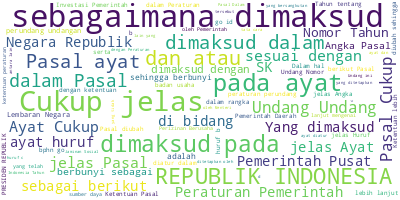

In [ ]:
wordcloud.generate(long_teks)

wordcloud.to_image()

##Sepertinya tidak perlu

In [ ]:
lenWord = 0
for i in df.ayat:
  lenWord += len(i)

meanLen = lenWord/ df.shape[0]

In [ ]:
ayat=[]
bobot =[]
Perundang_undangan =[]
for i, j, k, in zip(df['ayat'], df['bobot'], df['Peraturan Perundang Undangan']):
  if len(i) > meanLen:
    ayat.append(i)
    bobot.append(j)
    Perundang_undangan.append(k)


In [ ]:
new_df = pd.DataFrame({'ayat':ayat, 'bobot':bobot, 'Peraturan Perundang-undangan':Perundang_undangan})

##Preprocessing

In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
new_df = df.copy()

In [ ]:
new_df

ayat  bobot  \
0     Pasal 5 ayat (2) Undang-Undang Dasar 1945;   2...      3   
1     Pasal 37 ayat (5) Undang- Undang N o mor 1 Tah...      3   
2        BAB I …    www.bphn.go.id    PRESIDEN  REPU...      3   
3      2. Piutan g Daerah adalah jumlah ua ng yang w...      3   
4        7.  Panitia …       www.bphn.go.id    PRESI...      3   
...                                                 ...    ...   
7722     (5) Direktur Utama diwajibkan menyampaikan ...      3   
7723      Pasal 50    Hasil penilaian atas laporan k...      3   
7724      Bagian Ketigabelas   Penggunaan Laba     P...      3   
7725     (2) Apabila jumlah cadangan umum sebagaiman...      3   
7726      BAB IV   KETENTUAN PERALIHAN     Pasal 54 ...      3   

     Peraturan Perundang-undangan  
0            Peraturan_Pemerintah  
1            Peraturan_Pemerintah  
2            Peraturan_Pemerintah  
3            Peraturan_Pemerintah  
4            Peraturan_Pemerintah  
...                           ...  
7722                           PP  
7723                           PP  
7724                           PP  
7725                           PP  
7726                           PP  

[7727 rows x 3 columns]

In [ ]:
def Remove_punct(sentence):
  s = re.sub(r'Pasal \d+|ayat|bab|pasal|\([0-9]+\)|[^a-zA-Z\s]|\(|\)|\d+', '', sentence).strip()
  tmp = s.split(" ")
  tmp2 =[]
  for i in range(len(tmp)):
    if len(tmp[i]) > 1:
      tmp2.append(tmp[i])
  tmp2 = ' '.join(tmp2)
  tmp2 = tmp2.lower()
  return tmp2

In [ ]:
def remove_roman_numerals(text):
    pattern = r'\b(?:m{0,4}(?:cm|cd|d?c{0,3})(?:xc|xl|l?x{0,3})(?:ix|iv|v?i{0,3}))\b'
    return re.sub(pattern, '', text)

In [ ]:
Remove_punctuation=[]
for i in new_df['ayat']:
  Remove_punctuation.append(Remove_punct(i))

In [ ]:
rp= []
for i in Remove_punctuation:
  rp.append(remove_roman_numerals(i))

In [ ]:
panjangRP = 0
for i in rp:
  panjangRP += len(i)

In [ ]:
presentationRP= 1-panjangRP/lenWord
presentationRP

0.378478991785112

In [ ]:
stop= ['ol','danatau','nomor','lembar','huruf', 'ratus', 'rupiah', 'rp','ayat', 'puluh', 'juta', 'pasal', 'tahun', 'lembaran', 'wwwbphgoid', 'bab', 'wwwhukumonlinecom', 'ol', 'lb', 'sk', 'no', 'oo', 'll', 'lp', 'wwwbphngoid', 'wwwbphngoidpresidenrepublik','sebagaimana dimaksud', 'bagaimana maksud', 'bagaimana', 'maksud']

In [ ]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
stopwords.extend(stop)
def Stop_word(sentence):
  stop_word =[]
  i = sentence.split(" ")
  tmp=[]
  for j in i:
    if j not in stopwords:
      tmp.append(j)
  j= ' '.join(tmp)
  stop_word.append(j)
  return stop_word


In [ ]:
stop_words=[]
for i in rp:
  stop_words.append(Stop_word(i))


In [ ]:
jumlahSW = 0
for i in stop_words:
  for j in i:
    jumlahSW += len(j)

In [ ]:
1-jumlahSW/lenWord

0.4935642908261988

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def Stemming(sentence):
  hasil = stemming.append(stemmer.stem(str(sentence)))
  return hasil

In [ ]:
teks = "surat persetujuan ekspor surat persetujuan impor diatur Peraturan Pemerintah"
#teks = teks.split(" ")

In [ ]:
hasil=[]
for i in teks:
  print(print(Stemming(i)))

In [ ]:
hasil

In [ ]:
stemming=[]
for i in stop_words:
  hasil = Stemming(i)
  if hasil != None:
    stemming.append(hasil)

len(stemming)

In [ ]:
stem_teks = ' '.join(x for x in stemming if type(x) == str)
stem_teks

'undangundang dasar indische comptabiliteitswet staatsblad bagaimana beberapa kali ubah akhir undangundang negara tambah negara putus tetap atur perintah republik ndonesia serta modal negara republik indonesia dala diri usaha asuransi investasi kredit ekspor negara republik indonesia laku serta modal diri usaha asuransi investasi kredit ekspor nilai serta modal negara bagaimana maksud besar id laksana serta modal negara bagaimana maksud laku menteri uang atur perintah mulai laku tanggal undang orang tahu perintah undang atur perintah tempat negara republik indonesia undang undang mor tentan bendahara negara perlu tetap atur perintah tata cara hapus piutang negaradaerah ingat undangu ndan asar negara republik indonesia undangundang pr tenta panitia urus piutang negara lembara negara republik indonesia tambah negara republik indonesia undangundang mor uang negara negara republik in donesia tambah negara republik indonesia undangu ndang ahun bendahara negara negara repub lik indonesia tam

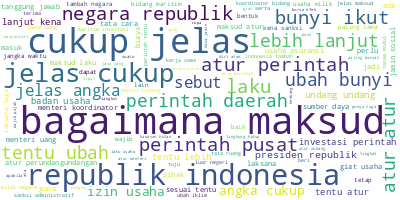

In [ ]:
stem_teks = ' '.join(x for x in stemming if type(x) == str)
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(stem_teks)
wordcloud.to_image()

In [ ]:
hasil_stem = pd.DataFrame({'stemming':stemming})

In [ ]:
hasil_stem.isna().sum()

stemming    0
dtype: int64

In [ ]:
hasil_stem.to_csv('hasil_stem.csv')
from google.colab import files
files.download('hasil_stem.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
hasil_stem = pd.read_csv('/content/drive/MyDrive/hasil_stem (1).csv')

In [ ]:
new_df['ayat_steming'] = hasil_stem['stemming'].copy()

In [ ]:
new_df['after_RP'] =rp

In [ ]:
new_df = new_df.dropna()

In [ ]:
new_df.shape

(7490, 5)

##Vectorizer

In [ ]:
bow = CountVectorizer(ngram_range=(1,2), tokenizer=word_tokenize, stop_words=sw_indo, min_df=3)
bow_matrix = bow.fit_transform(new_df.ayat_steming)
vocab = bow.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(


In [ ]:
vocab

array(['aa', 'aa koordinasi', 'aa presiden', ..., 'zonasi kawasan',
       'zonasi kelola', 'zonasi wilayah'], dtype=object)

In [ ]:
import numpy as np

with np.printoptions(threshold=np.inf):
    print(vocab)

In [ ]:
def get_topic(model):
  return [[vocab[idx] for idx in reversed(comp.argsort()[-6:])
            if vocab[idx].isalnum()] for comp in model.components_]

##LDA Topic Modelling

LDA (Latent Dirichlet Allocation) adalah sebuah metode statistik yang digunakan untuk melakukan Topic Modeling atau pemodelan topik pada sebuah koleksi dokumen teks. Tujuan dari Topic Modeling adalah mengidentifikasi topik-topik yang tersembunyi atau "latent" di dalam kumpulan dokumen tanpa ada label topik yang sudah ditentukan sebelumnya.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
with open("list_lda.txt","w") as f:
  f.write(str(perplexities))
  f.close()

1/22
2/22
3/22
4/22
5/22
6/22
7/22
8/22
9/22
10/22
11/22
12/22
13/22
14/22
15/22
16/22
17/22
18/22
19/22
20/22
21/22
22/22


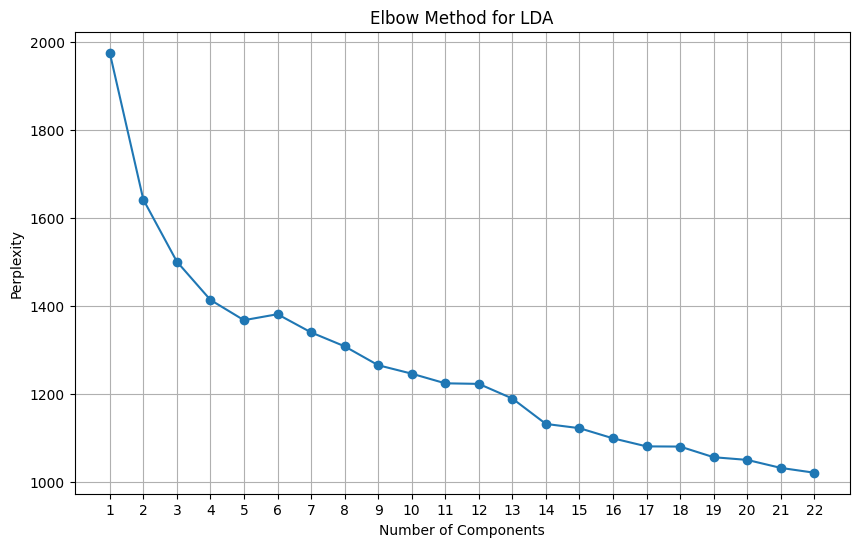

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
# Inisialisasi variabel untuk menyimpan nilai perplexity
perplexities = []

# Loop untuk mencoba nilai n_components dari 1 hingga 22
for n in range(1, 23):
    lda = LatentDirichletAllocation(n_components=n, max_iter=100, random_state=42)
    lda_matrix = lda.fit_transform(bow_matrix)

    # Menghitung perplexity
    perplexity = lda.perplexity(bow_matrix)
    perplexities.append(perplexity)
    print(str(n)+ "/"+"22")
# Plot elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 23), perplexities, marker='o')
plt.title('Elbow Method for LDA')
plt.xlabel('Number of Components')
plt.ylabel('Perplexity')
plt.xticks(np.arange(1, 23, step=1))
plt.grid(True)
plt.show()


In [ ]:
perplexities

[1975.0617569869578,
 1641.2338133427459,
 1500.1620311633249,
 1413.0827173705252,
 1366.935115091022,
 1380.5189786385665,
 1339.2204678732962,
 1307.5787865508453,
 1264.5984707029786,
 1245.359672757741,
 1223.4277036053368,
 1222.122722124542,
 1188.8356207992147,
 1131.051437879157,
 1121.4126012112397,
 1098.3113475678592,
 1080.0129082205945,
 1079.5884237896814,
 1055.3650783376158,
 1049.2884490271178,
 1031.1031869504372,
 1020.132611764348]

In [ ]:
urutan = np.arange(1, len(perplexities))
for i in urutan :
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [ ]:
lda = LatentDirichletAllocation(n_components=20, max_iter=100, random_state=42)
lda_matrix= lda.fit_transform(bow_matrix)

In [ ]:
topic_lda= get_topic(lda)

In [ ]:
topic_lda

[['menteri', 'negara', 'bidang', 'tugas', 'laksana', 'uang'],
 ['ikan', 'orang', 'usaha', 'penuh', 'indonesia', 'bunyi'],
 ['pajak', 'surat', 'wajib', 'maksud', 'harta'],
 ['modal', 'tanam', 'daerah', 'bidang', 'presiden'],
 ['sumber', 'daya', 'air', 'bumi', 'giat'],
 ['indonesia', 'republik', 'negara', 'undangundang'],
 ['hidup', 'lingkung', 'anggota', 'awas', 'dewan'],
 ['kerja', 'maksud', 'uang', 'laksana', 'janji', 'terima'],
 ['atur', 'perintah', 'kena', 'maksud'],
 ['anggar', 'barang', 'halal', 'laku', 'kena', 'produk'],
 ['usaha', 'badan', 'giat', 'maksud', 'milik'],
 ['kena', 'sanksi', 'administratif', 'maksud'],
 ['hutan', 'kawasan', 'hasil', 'laku', 'usaha'],
 ['perintah', 'pusat', 'daerah', 'standar'],
 ['lingkung', 'angka', 'bijak', 'bidang', 'laksana', 'rumus'],
 ['efek', 'milik', 'saham', 'uang', 'lapor', 'usaha'],
 ['pidana', 'ubah', 'bunyi', 'maksud', 'jamin'],
 ['investasi', 'dana', 'maksud', 'pangan', 'piutang', 'pensiun'],
 ['bangun', 'hapus', 'gedung', 'kerja', 'ang

##LSA Topic Modelling

LSA (Latent Semantic Analysis) atau Analisis Semantik Tersembunyi adalah sebuah teknik dalam pemrosesan bahasa alami dan analisis teks yang digunakan untuk melakukan Topic Modelling atau pemodelan topik pada kumpulan dokumen teks. Tujuan dari LSA adalah untuk mengidentifikasi pola atau hubungan semantik tersembunyi (latent) di antara kata-kata dalam dokumen dan mengelompokkannya ke dalam topik-topik yang relevan.


In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components = 20, n_iter=100, random_state=42)
lsa_matrix= lsa.fit_transform(bow_matrix)

In [ ]:
topic_lsa = get_topic(lsa)

In [ ]:
explained_variances

[0.09303137696512077,
 0.12800838791327881,
 0.14965553693949193,
 0.17016406485093977,
 0.19039747837570378,
 0.20885816373675017,
 0.22498494325830773,
 0.23950044811763382,
 0.25124195410773176,
 0.2620372047381746,
 0.2719591613775747,
 0.2815721615947668,
 0.2908522588904784,
 0.29994027125402056,
 0.30884980684021496,
 0.3173533762048157,
 0.3256732976974527,
 0.33353043408032135,
 0.34100002269142177,
 0.34820457766466417,
 0.355357304233867,
 0.36227179422783096,
 0.36889060117958555]

1/7491
2/7491
3/7491
4/7491
5/7491
6/7491
7/7491
8/7491
9/7491
10/7491
11/7491
12/7491
13/7491
14/7491
15/7491
16/7491
17/7491
18/7491
19/7491
20/7491
21/7491
22/7491
23/7491


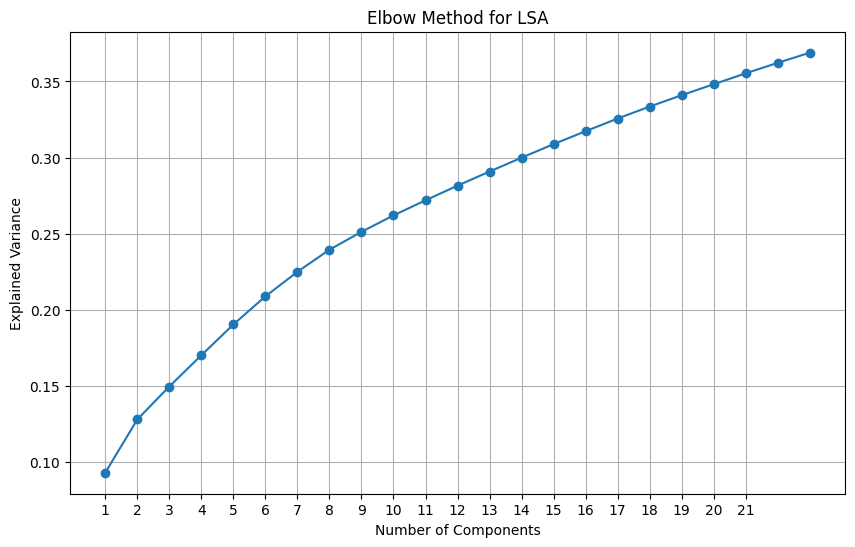

In [ ]:
explained_variances=[]
for n in range(1, min(bow_matrix.shape) + 1):
    svd = TruncatedSVD(n_components=n, random_state=42)
    svd_matrix = svd.fit_transform(bow_matrix)

    # Menghitung explained variance
    explained_variance = np.sum(svd.explained_variance_ratio_)
    explained_variances.append(explained_variance)
    print(str(n)+ "/"+str(min(bow_matrix.shape) + 1))
    if n == 23:
      break

# Plot elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), explained_variances, marker='o')
plt.title('Elbow Method for LSA')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.xticks(np.arange(1, 22, step=1))
plt.grid(True)
plt.show()

In [ ]:
topic_lsa

[['indonesia', 'negara', 'republik', 'undangundang'],
 ['republik', 'negara', 'indonesia', 'undangundang'],
 ['lingkung', 'ruang', 'perintah', 'bidang', 'laksana', 'rencana'],
 ['perintah', 'pusat', 'daerah'],
 ['usaha', 'lingkung', 'bidang', 'negara', 'laksana', 'badan'],
 ['ruang', 'wilayah', 'rencana', 'tata'],
 ['pajak', 'surat', 'daerah', 'pusat', 'wajib'],
 ['negara', 'usaha', 'ruang', 'badan', 'menteri', 'atur'],
 ['usaha', 'pajak', 'lingkung', 'atur', 'kena', 'bidang'],
 ['kerja', 'efek', 'lingkung', 'indonesia', 'jamin', 'modal'],
 ['hutan', 'kawasan', 'efek', 'hasil', 'modal'],
 ['ikan', 'kelola', 'uang', 'maksud', 'sumber', 'daya'],
 ['efek', 'modal', 'maksud', 'milik', 'bidang', 'ikan'],
 ['bangun', 'gedung', 'milik', 'lingkung', 'hutan'],
 ['ikan', 'daya', 'bangun', 'sumber', 'air'],
 ['ubah', 'milik', 'pidana', 'ikan', 'bunyi'],
 ['daerah', 'badan', 'kerja', 'undang', 'maksud'],
 ['jamin', 'kena', 'hutan', 'kawasan', 'jasa', 'sosial'],
 ['kerja', 'ikan', 'negara', 'lingku

##Kesimpulan

Topic modelling merupakan salah satu bentuk alat yang dapat memudahkan untuk memahami topik. Namun, untuk melakukan intepretasi topik yang didapatkan, perlu juga pemahaman konteks dalam hal ini konteks peraturan menteri keuangan.

Pengintepretasian ini juga ada baiknya dilakukan konfirmasi kepada expert untuk menghindari adanya miskonsepsi terhadap peraturan perundang-undangan